In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
df = pd.read_parquet(r"C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\data\processed\monthly.parquet")

print(df.columns)
df.head()

Index(['station_id', 'country', 'month', 'temperature', 'precipitation',
       'wind_speed', 'humidity', 'lat', 'lon'],
      dtype='object')


,station_id,country,month,temperature,precipitation,wind_speed,humidity,lat,lon
0,'S Gravenjansdijk,Belgium,2024-05-01,16.000000,0.29,7.805618,82.000000,51.25,3.63
1,'S Gravenjansdijk,Belgium,2024-06-01,20.041176,2.52,4.666704,64.294118,51.25,3.63
2,'S Gravenjansdijk,Belgium,2024-07-01,21.250000,4.14,4.461345,63.071429,51.25,3.63
3,'S Gravenjansdijk,Belgium,2024-08-01,23.567742,2.37,4.674769,56.387097,51.25,3.63
4,'S Gravenjansdijk,Belgium,2024-09-01,18.736667,5.95,5.643564,70.533333,51.25,3.63


In [20]:
df['month'] = pd.to_datetime(df['month'])

# Quick check
print(df.head())
print(df.info())

          station_id  country      month  temperature  precipitation  \
0  'S Gravenjansdijk  Belgium 2024-05-01    16.000000           0.29   
1  'S Gravenjansdijk  Belgium 2024-06-01    20.041176           2.52   
2  'S Gravenjansdijk  Belgium 2024-07-01    21.250000           4.14   
3  'S Gravenjansdijk  Belgium 2024-08-01    23.567742           2.37   
4  'S Gravenjansdijk  Belgium 2024-09-01    18.736667           5.95   

   wind_speed   humidity    lat   lon  
0    7.805618  82.000000  51.25  3.63  
1    4.666704  64.294118  51.25  3.63  
2    4.461345  63.071429  51.25  3.63  
3    4.674769  56.387097  51.25  3.63  
4    5.643564  70.533333  51.25  3.63  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   station_id     3984 non-null   object        
 1   country        3984 non-null   object        
 2   month       

In [22]:
# imports & output directory setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pycountry
from pathlib import Path

# Paths (from your message)
PARQUET_PATH = r"C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\data\processed\monthly.parquet"
REPORTS_DIR = r"C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports"
DESIGN_DIR = r"C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\design"
FIGURES_DIR = os.path.join(REPORTS_DIR, "figures")
TABLES_DIR = os.path.join(REPORTS_DIR, "tables")
WIREFRAMES_DIR = DESIGN_DIR  # design folder for mockups

# Create directories if they don't exist
for p in [REPORTS_DIR, DESIGN_DIR, FIGURES_DIR, TABLES_DIR]:
    Path(p).mkdir(parents=True, exist_ok=True)

# Plot settings
sns.set(style="whitegrid")
%matplotlib inline

In [23]:

# load parquet, inspect columns
df = pd.read_parquet(PARQUET_PATH)

print("Columns found:", list(df.columns))
print("First rows:")
display(df.head())
print("\nData summary:")
print(df.info())

Columns found: ['station_id', 'country', 'month', 'temperature', 'precipitation', 'wind_speed', 'humidity', 'lat', 'lon']
First rows:


,station_id,country,month,temperature,precipitation,wind_speed,humidity,lat,lon
0,'S Gravenjansdijk,Belgium,2024-05-01,16.000000,0.29,7.805618,82.000000,51.25,3.63
1,'S Gravenjansdijk,Belgium,2024-06-01,20.041176,2.52,4.666704,64.294118,51.25,3.63
2,'S Gravenjansdijk,Belgium,2024-07-01,21.250000,4.14,4.461345,63.071429,51.25,3.63
3,'S Gravenjansdijk,Belgium,2024-08-01,23.567742,2.37,4.674769,56.387097,51.25,3.63
4,'S Gravenjansdijk,Belgium,2024-09-01,18.736667,5.95,5.643564,70.533333,51.25,3.63



Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   station_id     3984 non-null   object        
 1   country        3984 non-null   object        
 2   month          3984 non-null   datetime64[ns]
 3   temperature    3984 non-null   float64       
 4   precipitation  3984 non-null   float64       
 5   wind_speed     3984 non-null   float64       
 6   humidity       3984 non-null   float64       
 7   lat            3984 non-null   float64       
 8   lon            3984 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 280.2+ KB
None


In [24]:
# convert monthly column to a datetime 'date' column


if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
elif 'month' in df.columns:
    df['date'] = pd.to_datetime(df['month'], errors='coerce')
else:
    # if neither exists, try to infer any datetime-like column
    datetime_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
    if datetime_cols:
        df['date'] = pd.to_datetime(df[datetime_cols[0]], errors='coerce')
    else:
        raise KeyError("No 'date' or 'month' column found in parquet. Columns: " + ", ".join(df.columns))

# check conversion
print("Datetime conversion results:")
print(df[['date']].head())
print("Date null count:", df['date'].isna().sum())

Datetime conversion results:
        date
0 2024-05-01
1 2024-06-01
2 2024-07-01
3 2024-08-01
4 2024-09-01
Date null count: 0


In [25]:
#  cleaning and feature creation
# Standardize country text
if 'country' in df.columns:
    df['country'] = df['country'].astype(str).str.strip()
else:
    df['country'] = 'Unknown'

# Ensure numeric columns exist and are numeric; adapt list if your column names differ
numeric_cols = []
for col in ['temperature', 'precipitation', 'wind_speed', 'humidity']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        numeric_cols.append(col)

# Extract year, month_num and month_name for seasonality
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')

print("Numeric columns for analysis:", numeric_cols)
print("Date range:", df['date'].min(), "to", df['date'].max())

Numeric columns for analysis: ['temperature', 'precipitation', 'wind_speed', 'humidity']
Date range: 2024-05-01 00:00:00 to 2025-12-01 00:00:00


In [26]:
# descriptive stats and saving
if numeric_cols:
    overall_stats = df[numeric_cols].describe().transpose()
    overall_stats['na_pct'] = df[numeric_cols].isna().mean() * 100
    overall_stats.to_csv(os.path.join(TABLES_DIR, "overall_stats.csv"))
    display(overall_stats)
else:
    print("No numeric columns found to summarize. Check column names.")

,count,mean,std,min,25%,50%,75%,max,na_pct
temperature,3984.0,22.273553,8.680905,-24.900000,17.536613,24.420490,28.029810,45.000000,0.0
precipitation,3984.0,3.856591,6.261540,0.000000,0.070000,1.460000,4.712500,70.290000,0.0
wind_speed,3984.0,3.623921,1.779317,1.000008,2.306470,3.419830,4.622797,32.478964,0.0
humidity,3984.0,65.337959,21.579709,4.966667,51.169633,69.852688,82.042915,100.000000,0.0


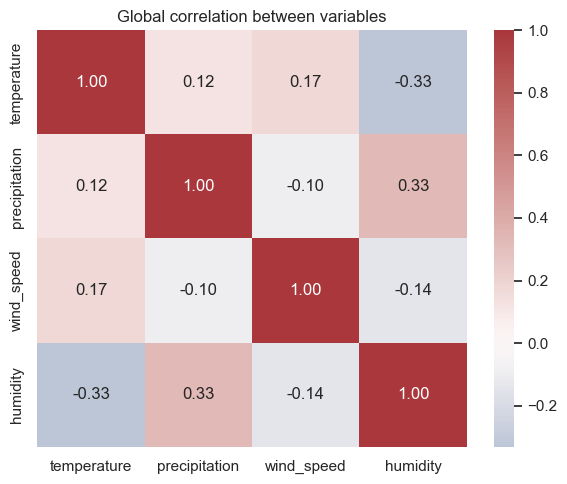

Saved correlation heatmap to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\figures\correlation_heatmap.png


In [27]:

#  correlation and heatmap
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    corr.to_csv(os.path.join(TABLES_DIR, "global_correlation.csv"))
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
    plt.title("Global correlation between variables")
    plt.tight_layout()
    heatmap_path = os.path.join(FIGURES_DIR, "correlation_heatmap.png")
    plt.savefig(heatmap_path, dpi=150)
    plt.show()
    print("Saved correlation heatmap to", heatmap_path)
else:
    print("Not enough numeric columns to compute correlation.")

In [28]:

#  monthly climatology (global average across years)
if 'temperature' in numeric_cols:
    global_monthly = df.groupby('month_num')['temperature'].mean().reset_index()
    month_order = list(range(1,13))
    fig = px.line(global_monthly, x='month_num', y='temperature', markers=True,
                  title='Global average temperature (climatology) by month',
                  labels={'month_num':'Month', 'temperature':'Temperature (units)'})
    fig.update_xaxes(tickmode='array', tickvals=month_order,
                     ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    html_path = os.path.join(FIGURES_DIR, "global_monthly_climatology.html")
    fig.write_html(html_path)
    fig.show()
    print("Saved global monthly climatology to", html_path)
else:
    print("Temperature column not found; skipping climatology plot.")

Saved global monthly climatology to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\figures\global_monthly_climatology.html


In [29]:
#  time series for a representative country (most records)
top_country = df['country'].value_counts().idxmax()
print("Top country by data volume:", top_country)
country_ts = (df[df['country']==top_country]
              .groupby('date')['temperature']
              .mean()
              .reset_index())

if not country_ts.empty:
    fig = px.line(country_ts, x='date', y='temperature', title=f'Avg monthly temperature — {top_country}')
    path = os.path.join(FIGURES_DIR, f"{top_country}_timeseries.html")
    fig.write_html(path)
    fig.show()
    print("Saved timeseries to", path)
else:
    print("No time series data available for", top_country)

Top country by data volume: Bulgaria


Saved timeseries to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\figures\Bulgaria_timeseries.html


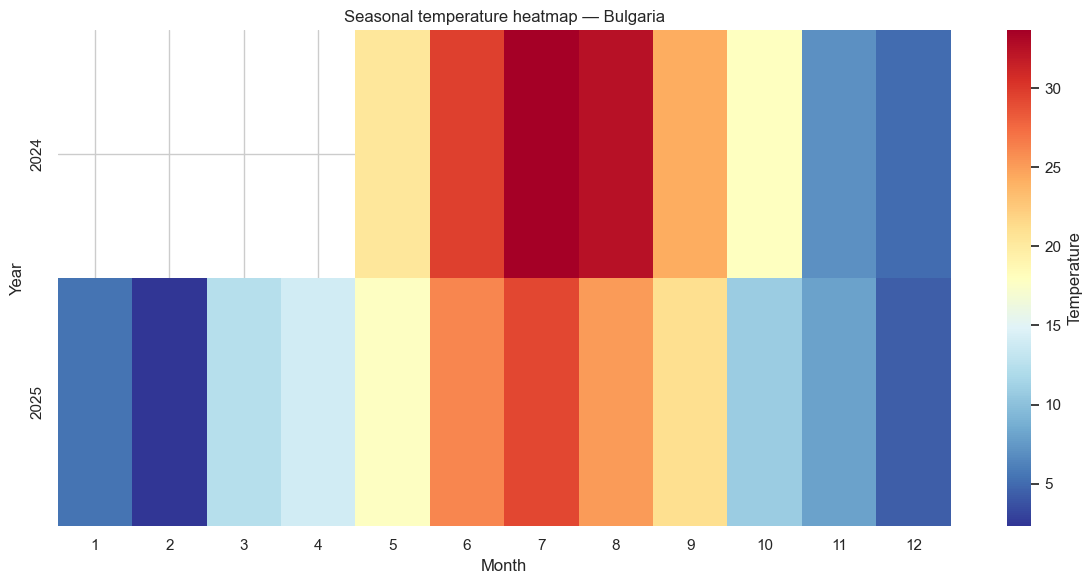

Saved seasonal heatmap to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\figures\Bulgaria_seasonal_heatmap.png


In [30]:
# seasonal heatmap (year vs month) for top country
pivot = (df[df['country']==top_country]
         .pivot_table(index='year', columns='month_num', values='temperature', aggfunc='mean'))

if pivot.shape[0] > 0:
    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, cmap='RdYlBu_r', cbar_kws={'label':'Temperature'})
    plt.title(f"Seasonal temperature heatmap — {top_country}")
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.tight_layout()
    heatmap_file = os.path.join(FIGURES_DIR, f"{top_country}_seasonal_heatmap.png")
    plt.savefig(heatmap_file, dpi=150)
    plt.show()
    print("Saved seasonal heatmap to", heatmap_file)
else:
    print("Not enough data to create heatmap for", top_country)

In [31]:
#  detect extremes and save tables
# Temperature extremes via station z-score (if station_id present)
if 'temperature' in numeric_cols:
    if 'station_id' in df.columns:
        df['temp_z'] = df.groupby('station_id')['temperature'].transform(lambda x: (x - x.mean()) / x.std())
    else:
        df['temp_z'] = (df['temperature'] - df['temperature'].mean()) / df['temperature'].std()

    extreme_temp = df[df['temp_z'].abs() >= 2].sort_values(by='temp_z', key=lambda s: s.abs(), ascending=False)
    extreme_temp_path = os.path.join(TABLES_DIR, "extreme_temperature_events.csv")
    extreme_temp.to_csv(extreme_temp_path, index=False)
    print("Saved extreme temperature events to", extreme_temp_path)
else:
    print("Temperature column not present; skipping temperature extremes.")

# Precipitation extremes (95th percentile)
if 'precipitation' in numeric_cols:
    precip_thresh = df['precipitation'].quantile(0.95)
    extreme_precip = df[df['precipitation'] >= precip_thresh].sort_values('precipitation', ascending=False)
    extreme_precip_path = os.path.join(TABLES_DIR, "extreme_precipitation_events.csv")
    extreme_precip.to_csv(extreme_precip_path, index=False)
    print("Saved extreme precipitation events to", extreme_precip_path, " (95th pct threshold:", precip_thresh, ")")
else:
    print("Precipitation column not present; skipping precipitation extremes.")

Saved extreme temperature events to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\tables\extreme_temperature_events.csv
Saved extreme precipitation events to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\tables\extreme_precipitation_events.csv  (95th pct threshold: 16.087999999999994 )


In [32]:
#  scatter plot temperature vs precipitation with extremes highlighted
sample_df = df.sample(n=min(3000, len(df)), random_state=42)
fig = px.scatter(sample_df, x='temperature', y='precipitation',
                 color='temperature', color_continuous_scale='RdYlBu', title='Temp vs Precip (sample)')

# overlay extreme temperature top points (if any)
if 'extreme_temp' in globals() and not extreme_temp.empty:
    top_ext = extreme_temp.head(200)
    fig.add_trace(go.Scatter(x=top_ext['temperature'], y=top_ext['precipitation'],
                             mode='markers', marker=dict(size=8, symbol='x', color='black'),
                             name='Temp extremes'))

html_scatter = os.path.join(FIGURES_DIR, "temp_vs_precip_extremes.html")
fig.write_html(html_scatter)
fig.show()
print("Saved scatter with extremes to", html_scatter)

Saved scatter with extremes to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\figures\temp_vs_precip_extremes.html


,country,temperature
158,Saudi Arabien,45.000000
114,Marrocos,40.300000
189,Turkménistan,37.800000
94,Kuwait,34.163106
208,Турция,34.000000
147,Qatar,33.894143
194,United Arab Emirates,33.681310
157,Saudi Arabia,33.221317
48,Djibouti,32.383915
136,Oman,32.276881


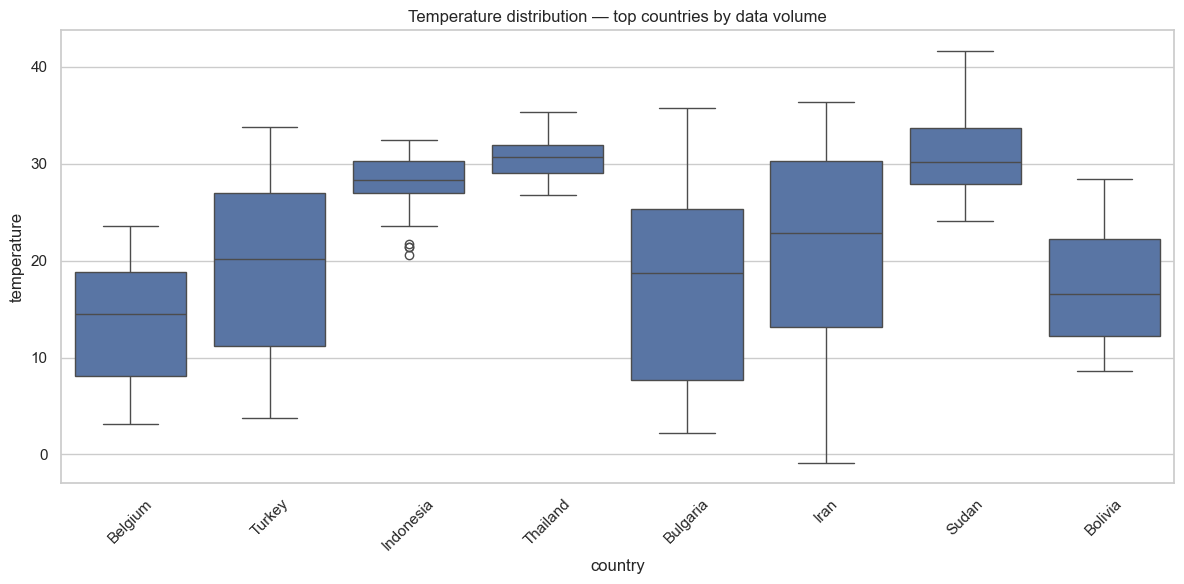

Saved boxplot to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\figures\temp_boxplot_top_countries.png


In [33]:
#  country-level comparison
if 'temperature' in numeric_cols:
    country_mean_temp = df.groupby('country')['temperature'].mean().reset_index().sort_values('temperature', ascending=False)
    country_mean_temp.to_csv(os.path.join(TABLES_DIR, "country_mean_temperature.csv"), index=False)
    display(country_mean_temp.head(20))

    # Boxplot for top N countries by record count
    topN = df['country'].value_counts().nlargest(8).index.tolist()
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[df['country'].isin(topN)], x='country', y='temperature')
    plt.title('Temperature distribution — top countries by data volume')
    plt.xticks(rotation=45)
    boxplot_file = os.path.join(FIGURES_DIR, "temp_boxplot_top_countries.png")
    plt.tight_layout()
    plt.savefig(boxplot_file, dpi=150)
    plt.show()
    print("Saved boxplot to", boxplot_file)
else:
    print("Temperature column missing; cannot produce country comparison.")

In [34]:

# choropleth map of mean temperature by country
# Helper function to map to ISO3 codes
def country_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except Exception:
        return None

if 'temperature' in numeric_cols:
    choro_df = country_mean_temp.copy()
    choro_df['iso_a3'] = choro_df['country'].apply(country_to_iso3)
    missing_iso = choro_df[choro_df['iso_a3'].isna()]['country'].unique()
    if len(missing_iso) > 0:
        print("Warning: some countries lacked ISO3 mapping (you may add manual mappings):", missing_iso[:10])

    choro_df = choro_df.dropna(subset=['iso_a3'])
    fig = px.choropleth(choro_df, locations='iso_a3', color='temperature',
                        hover_name='country', color_continuous_scale='thermal',
                        title='Mean temperature by country (all years)')
    choro_path = os.path.join(FIGURES_DIR, "choropleth_mean_temp.html")
    fig.write_html(choro_path)
    fig.show()
    print("Saved choropleth to", choro_path)
else:
    print("Temperature missing; skipping choropleth.")

 'Seychelles Islands' 'Micronesia' 'Saint-Vincent-et-les-Grenadines']


Saved choropleth to C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports\figures\choropleth_mean_temp.html


In [35]:
# summary markdown and wireframe text
summary_md = f"""
# Milestone 2 — EDA & Visualization Summary

- Parquet source: {PARQUET_PATH}
- Rows: {len(df)}
- Date range: {df['date'].min()} to {df['date'].max()}
- Numeric columns analyzed: {numeric_cols}

## Key outputs (saved in {REPORTS_DIR})
- Overall stats: tables/overall_stats.csv
- Correlation heatmap: figures/correlation_heatmap.png
- Global monthly climatology: figures/global_monthly_climatology.html
- Top country timeseries: figures/{top_country}_timeseries.html
- Seasonal heatmap: figures/{top_country}_seasonal_heatmap.png
- Extreme temperature events: tables/extreme_temperature_events.csv
- Extreme precipitation events: tables/extreme_precipitation_events.csv
- Country mean temperature: tables/country_mean_temperature.csv
- Choropleth: figures/choropleth_mean_temp.html

Use these files for the Milestone 2 report.
"""
with open(os.path.join(REPORTS_DIR, "milestone2_summary.md"), "w", encoding="utf-8") as f:
    f.write(summary_md)

wireframe_text = """
Dashboard wireframe (text draft)
--------------------------------
Top: Title | Date-range selector | Variable selector (temperature/precipitation/wind/humidity)
Left (60%): Global choropleth (country averages)
Right (40%):
  - Top: Time series for selected country
  - Middle: Seasonal heatmap (month vs year)
  - Bottom: Table of recent extreme events (filter by metric, station/country)
Footer: Small insight cards (hottest avg country, wettest avg country, most-anomalous month)
"""
with open(os.path.join(WIREFRAMES_DIR, "dashboard_wireframe.txt"), "w", encoding="utf-8") as f:
    f.write(wireframe_text)

print("Wrote milestone2_summary.md and dashboard_wireframe.txt")
print("Reports saved to:", REPORTS_DIR)
print("Wireframe saved to:", WIREFRAMES_DIR)

Wrote milestone2_summary.md and dashboard_wireframe.txt
Reports saved to: C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\reports
Wireframe saved to: C:\Users\mukhe\OneDrive\Desktop\coding\project1\climatescope-project\design
